# Cálculo Numérico
## Avaliação 3_2: Discursiva
<hr>
Aluno: Gabriel Brito Melandes

Curso: Ciência da Computação

Matricula: 171057600079
<hr>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import integrate  # utilizado na quadratura gaussiana

<hr> 

## Funções

In [2]:
def int_trapezios_simples(F, a, b):
    integral = ((F(a) + F(b)) * ((b - a) / 2))
    return integral


def int_trapezios(F, a, b, n):  # integração trapezoidal
    h = float(b - a) / n
    integral = 0.5 * F(a) + 0.5 * F(b)
    for i in range(1, n):
        integral += F(a + i * h)
    return integral * h


def int_simpson(F, a, b, n):  # integração de simpson
    h = (b - a) / (3 * n)
    integral = F(a) + F(b)
    for i in range(1, n):
        if (i % 2 == 1):
            integral += 4 * F(a + (i * (b - a) / n))
        else:
            integral += 2 * F(a + (i * (b - a) / n))
    return integral * h

# Exercícios 

<hr>

## Encontre a aproximação polinomial por Mínimos Quadrados para 

$$f(x) = \frac{1}{x}$$ 

no intervalo $x \in [1,3]$ utilizando um polinômio de grau 3.
<hr>

### Resolvendo:
Vamos utilizar intervalos de 0,4 para calcular $f(x)$, sendo assim, teremos a seguinte tabela

|  x  |   f(x)  |  f(x) |
|:---:|:-------:|:-----:|
|  1  |    1    |   1   |
| 1,4 | 0,71428 |   5/7 |
| 1,8 | 0,55555 |   5/9 |
| 2,2 | 0,45454 |   4/9 |
| 2,6 | 0,38461 |   3/8 |
|  3  | 0,33333 |   1/3 |

Utilizando o Método dos Mínimos Quadrados teremos que o polinômio de grau 3 que representa o gráfico será:
\begin{align}
\sum{y} &= an + b \sum{x} + c\sum{x^2}+ d\sum{x^3}\\
\sum{xy} &= a\sum{x} + b \sum{x^2} + c\sum{x^3}+ d\sum{x^4}\\
\sum{x^{2}y} &= a\sum{x^2} + b \sum{x^3} + c\sum{x^4}+ d\sum{x^5}\\
\sum{x^{3}y} &= a\sum{x^3} + b \sum{x^4} + c\sum{x^5}+ d\sum{x^6}
\end{align}

Utilizando uma planilha temos a seguinte tabela:

| $x$   | $f(x)$              | $f(x)$  | $x^2$  | $x^3$    | $x^4$      | $x^5$       | $x^6$        | $xy$ | $x^2y$ | $x^3y$ |
|-----|-------------------|-------|------|--------|----------|-----------|------------|-----|-------|-------|
| 1   | 1                 | 1     | 1    | 1      | 1        | 1         | 1          | 1   | 1     | 1     |
| 1,4 | 0,714285714285714 |  5/7  | 1,96 | 2,744  | 3,8416   | 5,37824   | 7,529536   | 1   | 1,4   | 1,96  |
| 1,8 | 0,555555555555556 |  5/9  | 3,24 | 5,832  | 10,4976  | 18,89568  | 34,012224  | 1   | 1,8   | 3,24  |
| 2,2 | 0,454545454545455 |  4/9  | 4,84 | 10,648 | 23,4256  | 51,53632  | 113,379904 | 1   | 2,2   | 4,84  |
| 2,6 | 0,384615384615385 |  3/8  | 6,76 | 17,576 | 45,6976  | 118,81376 | 308,915776 | 1   | 2,6   | 6,76  |
| 3   | 0,333333333333333 |  1/3  | 9    | 27     | 81       | 243       | 729        | 1   | 3     | 9     |
|     |                   |       |      |        |          |           |            |     |       |       |
| 12  | 3,44233544233544  | 3 4/9 | 26,8 | 64,8   | 165,4624 | 438,624   | 1193,83744 | 6   | 12    | 26,8  |

*O último elemento corresponde ao somatório do dado em questão.*

Substituindo os valores na equação temos:

\begin{align}
6x_1+12x_2+26.8x_3+64.8x_4&=3.4423\\
12x_1+26.8x_2+64.8x_3+165.4624x_4&=6\\
26.8x_1+64.8x_2+165.4624x_3+438.624x_4&=12\\
64.8x_1+165.4624x_2+438.624x_3+1193.8374x_4&=26.8
\end{align}

**Passo a passo para resolver a equação**

$$ A = \left[ \begin{matrix} 6 & 12 & 26.8 & 64.8 \\ 12 & 26.8 & 64.8 & 165.4624 \\ 26.8 & 64.8 & 165.4624 & 438.624 \\ 64.8 & 165.462 & 438.624 & 1193.8374 \end{matrix} \right] \\ 
B = \left[ \begin{matrix} 3.4423\\6\\12\\26.8 \end{matrix}\right]$$ 
$A = B$

Utilizando o método de Gauss para resolver, temos:

$$\left[ \begin{matrix}     6	    &    12	 &    \frac{134}{5}	 &      \frac{324}{5} &	\frac{34423}{10000}\\
   12	 &    \frac{134}{5}	  &   \frac{324}{5}	 & \frac{103414}{625}	    &      6\\
\frac{134}{5}	 &    \frac{324}{5}	& \frac{103414}{625}	&   \frac{54828}{125}	 &        12\\
\frac{324}{5}	 & \frac{10341}{625}	& \frac{54828}{125}	&\frac{5969187}{5000}	 &     \frac{134}{5}
\end{matrix} \right]$$

$L_2 = L_2 * -2L_1\\L_3 = L_3 * -\frac{67}{15}L_1\\L_4 = L_4* -\frac{54}{5}L_1$

$$\left[ \begin{matrix}
6 &        12 &      \frac{134}{5} &       \frac{324}{5} &    \frac{34423}{10000} \\
0 &      \frac{14}{5} &       \frac{56}{5} &    \frac{22414}{625} &     \frac{-4423}{5000} \\
0 &      \frac{56}{5} & \frac{85792}{1875} &    \frac{18648}{125} & \frac{-506341}{150000} \\
0 & \frac{22414}{625} &  \frac{18648}{125} & \frac{2469987}{5000} &  \frac{-259421}{25000} 
\end{matrix}\right]$$

$L_3 = L_3 * -4L_2\\L_4 = L_4* -\frac{1601}{125}L_2$
$$\left[ \begin{matrix}
6&  12&    \frac{134}{5}&          \frac{324}{5}&  \frac{34423}{10000} \\
0&\frac{14}{5}&     \frac{56}{5}&      \frac{22414}{625}&   \frac{-4423}{5000} \\
0&   0&\frac{1792}{1875}&       \frac{3584}{625}& \frac{24419}{150000} \\
0&   0& \frac{3584}{625}&\frac{21669863}{625000}&\frac{297849}{312500} \\
\end{matrix}\right]$$

$$L_4 = L_4 * -6L_3->\left[ \begin{matrix}
6&  12&    \frac{134}{5} &        \frac{324}{5} &  \frac{34423}{10000}\\
0&\frac{14}{5} &     \frac{56}{5} &    \frac{22414}{625} &   \frac{-4423}{5000}\\
0&   0&\frac{1792}{1875} &     \frac{3584}{625} & \frac{24419}{150000}\\
0&   0&        0&\frac{165863}{625000}&\frac{-14777}{625000}
\end{matrix}\right]$$


Com isso já podemos resolver, agora resolvendo $x_4$ até $x_1$ temos:

\begin{equation}
\frac{165863}{625000}*x_4=\frac{-14777}{625000}\\
x_4=-\frac{14777}{165863}\\
\end{equation}

\begin{equation}
\frac{1792}{1875}x_3=\frac{24419}{150000}-\frac{3584}{625}x_4=\\\frac{24419}{150000}-\frac{3584}{625}-\frac{14777}{165863}=\frac{16760792917}{24879450000}\\
x_3=\frac{16760792917}{23778119680}
\end{equation}

\begin{equation}
\frac{14}{5}x_2=-\frac{4423}{5000}-\frac{56}{5}x_3-\frac{22414}{625}x_4=-\frac{4423}{5000}-\frac{56}{5}(\frac{16760792917}{23778119680})-\frac{22414}{625}(\frac{-14777}{165863})\\
x_2 = \frac{-11855624597}{2123046400}
\end{equation}

\begin{align}
6x_1&=\frac{34423}{10000}-12x_2-\frac{134}{5}x_3-\frac{324}{5}x_4\\
&=\frac{34423}{10000}-12(-\frac{11855624597}{5944529920})-\frac{134}{5}*\frac{16760792917}{23778119680}-\frac{324}{5}*(-\frac{14777}{165863})\\
&= \frac{21187903906929}{1486132480000}\\
x_1&=\frac{7062634635643}{2972264960000}
\end{align}

Utilizando python para resolver temos as frações, temos:

In [3]:
x1 = 7062634635643 / 2972264960000
x2 = -11855624597 / 5944529920
x3 = 16760792917 / 23778119680
x4 = -14777 / 165863
print('P_3(x) = {:.5f} + {:.5f}x + {:.5f}x^2 + {:.5f}x^3'.format(
    x1, x2, x3, x4))

P_3(x) = 2.37618 + -1.99438x + 0.70488x^2 + -0.08909x^3


Tudo isso pode também pode ser feito utilizando **linalg**

In [4]:
# utilizando python para resolver (bem mais simples, não?)
A = np.array([[6, 12, 26.8, 64.8], [12, 26.8, 64.8, 165.4624],
              [26.8, 64.8, 165.4624, 438.624],
              [64.8, 165.4624, 438.624, 1193.8374]])
B = np.array([3.4423, 6, 12, 26.8])
x = np.linalg.inv(A).dot(B)  # não é o mesmo método do passo a passo
# calcula o inverso de A e faz o produto de A^{-1} e B.
# retorna o formato do polinômio (a + bx + cx^2 + dx^3)
x

array([ 2.37617936, -1.99437546,  0.70488302, -0.0890916 ])

In [5]:
np.linalg.solve(A, B)  # faz o mesmo porem escolhe automaticamente o método.

array([ 2.37617936, -1.99437546,  0.70488302, -0.0890916 ])

Portanto, o polinômio de grau 3 pelo método dos mínimos quadrados que representa a função com os dados utilizados é:
$$ P_3(x) = 2.37617936 -1.99437546x +  0.70488302x^2 -0.0890916x^3 $$

<hr>

## Calcule uma aproximação para a integral de

$$ \int_{1}^{3}\frac{1}{x}dx$$

através da

(a) [0,5] Regra dos Trapézios.

(b) [0,5] Regra dos Simpson.

(c) [0,5] Integral da aproximação cúbica da questão anterior.

(d) [0,5] Quadratura Gaussiana com 2 pontos.

(e) [0,5] Compare os resultados com o valor da integral.
<hr>

In [6]:
def f(x):  # função da questão 2
    return 1 / x

### Resolvendo:


Integração Trapezoidal:
\begin{align}
\int_{1}^{3}f(x)dx &= \frac{F(1)+F(3)}{2}(3-1) = \frac{\frac{1}{1}+\frac{1}{3}}{2}(3-1) = \frac{\frac{4}{3}}{2}(2) \\&= \frac{4}{3}
\end{align}
Temos que a integral é $\frac{4}{3}$.

Integração de Simpson:
\begin{align}
\int_{1}^{3}f(x)dx &= \left(\frac{f(a)+4*f(\frac{a+b}{2})+f(b)}{3}\right)\frac{(b-a)}{2} \\
&= \left(\frac{f(1)+4*f(\frac{1+3}{2})+f(3)}{3}\right)\frac{(3-1)}{2} \\
&= \left(\frac{\frac{1}{1}+4*\frac{1}{2}+\frac{1}{3}}{3}\right)\frac{(3-1)}{2}\\
& = \frac{10}{9}
\end{align}
Utiliando implementação já feita anteriormente - ver imports - e utilizando-as, temos:

In [7]:
print("A) Integração trapezoidal simples: {:.5f}".format(
    int_trapezios_simples(f, 1, 3)))
print("A) Integração trapezoidal com n = 5: {:.5f}".format(
    int_trapezios(f, 1, 3, 5)))
print("B) Integração de Simpson simples: {:.5f}".format(int_simpson(
    f, 1, 3, 2)))
print("B) Integração de Simpson com n = 5: {:.5f}".format(
    int_simpson(f, 1, 3, 5)))

A) Integração trapezoidal simples: 1.33333
A) Integração trapezoidal com n = 5: 1.11027
B) Integração de Simpson simples: 1.11111
B) Integração de Simpson com n = 5: 1.05187


Para o item C, temos o polinômio:
$$ P_3(x) = 2.37617936 -1.99437546x +  0.70488302x^2 -0.0890916x^3 $$

\begin{align}
\int_{1}^{3}P_3(x)dx = \int_{1}^{3}(2.37617936 -1.99437546x +  0.70488302x^2 -0.0890916x^3)dx\\
\left[2.37617936 -1.99437546\frac{x^2}{2} +  0.70488302\frac{x^3}{3} -0.0890916\frac{x^4}{4}
\right]_{1}^{3} = 1.102011 
\end{align}

C) A integral do polinômio $$\int_{1}^{3}P_3(x) = 1.10201$$

item d) Quanto a quadratura
A quadratura é dada por:
\begin{equation}
\int_{a}^{b}\frac{b-a}{2}\sum_{i}^{n}w_i f\left(\frac{b-a}2x_i+\frac{b+a}{2})\right)
\end{equation}
Com n = 2 temos valores fixos para $x_i = \frac{\sqrt(3)}{3}$ e o peso $(w) = 1$. Dessa forma temos que:
\begin{align}
\int_{1}^{3}\frac{1}{x} &= w_o f\left(\frac{3-1}{2}*\frac{\sqrt3}{3}+\frac{3+1}{2}\right) w_1 f\left(\frac{3-1}{2}*\frac{-\sqrt3}{3}+\frac{3+1}{2}\right)\\
&=1*\frac{1}{\frac{\sqrt3}{3}+2}+1*\frac{1}{\frac{-\sqrt3}{3}+2} \\&= 1,09091
\end{align}

Portanto, a integral via Quadratura Gaussiana é $1,09091$.

In [8]:
# Item D por código
a, b = 1, 3
result, err = sp.integrate.fixed_quad(f, a, b, n=2)
print(
    'd) Integração por Quadratura Gaussiana com n = 2: {:.5f}'.format(result))
result, err = sp.integrate.fixed_quad(f, a, b, n=5)
print('Integração por Quadratura Gaussiana com n = 5: {:.5f}'.format(result))

d) Integração por Quadratura Gaussiana com n = 2: 1.09091
Integração por Quadratura Gaussiana com n = 5: 1.09861


e) O método de Integração da Quadratura de Gauss foi o que mais se aproximou do valor real de integração. Seguido pela aproximação cúbica, em seguida o método de Simpson. O pior método foi trapezoidal.

<hr>

## Considere a seguinte tabela de dados obtida ao calcular o valor de função $f(x)$ no intervalo $[0,1]$.

<center>Tabela 1: Dados</center>

| x    | f(x)      |
| :--: | :-------: |
| 0\.0 | 1\.000000 |
| 0\.1 | 0\.999950 |
| 0\.2 | 0\.999200 |
| 0\.3 | 0\.995953 |
| 0\.4 | 0\.987227 |
| 0\.5 | 0\.968912 |
| 0\.6 | 0\.935897 |
| 0\.7 | 0\.882333 |
| 0\.8 | 0\.802096 |
| 0\.9 | 0\.689498 |
| 1\.0 | 0\.540302 |

Se temos que integrar a função $f$, vamos ser obrigados a utilizar a tabela acima. A vantagem é que os dados estão igualmente espaçados.

(a) [0,5] Com os dados originais, utilize a Regra dos Trapézios Repetida para aproximar o valor da integral.

(b) [0,5] Com os dados originais, utilize a Regra de Simpson Repetida para aproximar o valor da integral. 

(c) [1,0] Como não temos a função para calcular as derivadas e obter uma estimativa para o erro, vamos utilizar as diferenças dividas supondo que é

$$ \Delta^{(n)}f(x) \approx f^{(n)}(x) $$

onde $\Delta^{(n)}f(x)$ representa a diferença dividida de ordem $n$. Utilize a expressãoa cima para determinar estimativas máximas para os erros ao utilizar os métodos de integração dos dois itens anteriores.
<hr>

#### Gráfico:

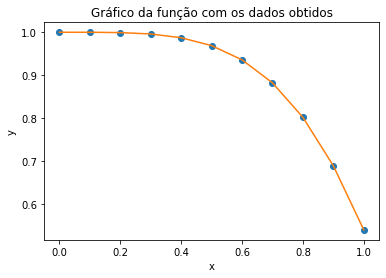

In [9]:
x = np.linspace(0,1,11)
y = np.array([1.000000 , 0.999950 , 0.999200 , 0.995953 , 0.987227 , 0.968912 ,
                 0.935897 , 0.882333 , 0.802096 , 0.689498 , 0.540302])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da função com os dados obtidos')
plt.plot(x,y,'o')
plt.plot(x,y)
plt.show()

### Resolvendo:
Para o item a), temos o seguinte:
Integração pela regra dos trapézios repetida:

a) 
\begin{equation}
\sum_{i=0}^{n-1}\frac{h}{2}[f(x_i)+f(x_{i+1})]
\end{equation}
Como já temos a tabela só precisamos substitutir os valores:
\begin{align}
x = \frac{0.1}{2}[&1.000000+&0.999950+&0.999200+&0.995953+\\&0.987227+&0.968912+&0.935897+&0.882333+\\&0.802096+&0.689498+&0.540302]
\end{align}

O valor calculado será feito abaixo:

In [10]:
x = (0.1 / 2) * (1.000000 + 0.999950 + 0.999200 + 0.995953 + 0.987227 + 0.968912 +
                 0.935897 + 0.882333 + 0.802096 + 0.689498 + 0.540302)
x

0.4900684000000001

a) Portanto a área é **0.49007**

b) Temos que, para o Método de Simpson, a integração é no seguinte formato:
\begin{equation}
\int_{a}^{b}f(x)dx \approx \frac{h}{3}\left[f(x_0)+f(x_m)+2\sum_{i=1}^{\frac{m}{2}}f(x_{2i})+4\sum_{i=1}^{\frac{m}{2}}f(x_{2i-1})\right]
\end{equation}
Sendo assim, temos que:

\begin{align}
x = \frac{0.1}{3}[&1.000000+&4*0.999950+&2*0.999200+&4*0.995953+\\&2*0.987227+&4*0.968912+&2*0.935897+&4*0.882333+\\&2*0.802096+&4*0.689498+&0.540302]
\end{align}
O valor calculado é feito abaixo:

In [11]:
x = (0.1 / 3) * (1.000000 + 4 * 0.999950 + 2 * 0.999200 + 4 * 0.995953 +
                 2 * 0.987227 + 4 * 0.968912 + 2 * 0.935897 + 4 * 0.882333 +
                 2 * 0.802096 + 4 * 0.689498 + 0.540302)
x

0.9045242000000001

b) Portanto a área é **0.90452**

c) Com o auxílio de uma planilha foi feito parcialmente o solicitado. Temos a seguinte tabela que o representa:

| $x$ |    $y$   |  $n_1$  |  $n_2$  |  $n_3$  |  $n_4$  |  $n_5$ |  $n_6$ |  $n_7$ |  $n_8$  |  $n_9$  |$n_{10}$|
|:---:|:--------:|:-------:|:-------:|:-------:|:-------:|:------:|:------:|:------:|:-------:|:-------:|:------:|
|  0  |     1    |         |         |         |         |        |        |        |         |         |        |
|     |          | -0,0005 |         |         |         |        |        |        |         |         |        |
| 0,1 |  0,99995 |         |  -0,35  |         |         |        |        |        |         |         |        |
|     |          | -0,0075 |         | -0,2995 |         |        |        |        |         |         |        |
| 0,2 |  0,9992  |         | -0,1248 |         | -0,4938 |        |        |        |         |         |        |
|     |          | -0,0325 |         |  -0,497 |         | 0,0475 |        |        |         |         |        |
| 0,3 | 0,995953 |         |  -0,274 |         |  -0,47  |        | 0,0972 |        |         |         |        |
|     |          | -0,0873 |         |  -0,685 |         | 0,1058 |        |  0,131 |         |         |        |
| 0,4 | 0,987227 |         | -0,4794 |         | -0,4171 |        | 0,1889 |        |  -0,005 |         |        |
|     |          | -0,1831 |         | -0,8518 |         | 0,2192 |        |  0,127 |         | -0,0386 |        |
| 0,5 | 0,968912 |         |  -0,735 |         | -0,3075 |        | 0,2778 |        | -0,0397 |         | 0,1047 |
|     |          | -0,3302 |         | -0,9748 |         | 0,3858 |        | 0,0952 |         |  0,0661 |        |
| 0,6 | 0,935897 |         | -1,0274 |         | -0,1146 |        | 0,3444 |        |  0,0198 |         |        |
|     |          | -0,5356 |         | -1,0207 |         | 0,5925 |        | 0,1111 |         |         |        |
| 0,7 | 0,882333 |         | -1,3336 |         |  0,1817 |        | 0,4222 |        |         |         |        |
|     |          | -0,8024 |         |  -0,948 |         | 0,8458 |        |        |         |         |        |
| 0,8 | 0,802096 |         | -1,6181 |         |  0,6046 |        |        |        |         |         |        |
|     |          |  -1,126 |         | -0,7062 |         |        |        |        |         |         |        |
| 0,9 | 0,689498 |         | -1,8299 |         |         |        |        |        |         |         |        |
|     |          |  -1,492 |         |         |         |        |        |        |         |         |        |
|  1  | 0,540302 |         |         |         |         |        |        |        |         |         |        |

Para facilitar e agilizar o solicitado, será utilizado uma implementação já existente. Segue abaixo:

In [12]:
def coef(x, y):
    # https://pt.coredump.biz/questions/14823891/newtons-interpolating-polynomial-python
    #  x : array of data points
    #   y : array of f(x)
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            a[i] = float(a[i] - a[i - 1]) / float(x[i] - x[i - j])
    return np.array(a)  # return an array of coefficient


def Eval(a, x, r):
    # a : array returned by function coef()
    # x : array of data points
    # r : the node to interpolate at
    x.astype(float)
    n = len(a) - 1
    temp = a[n] + (r - x[n])
    for i in range(n - 1, -1, -1):
        temp = temp * (r - x[i]) + a[i]
    return temp  # return the y_value interpolation

In [13]:
x = np.linspace(0, 1, 11)
y = np.array([
    1.000000, 0.999950, 0.999200, 0.995953, 0.987227, 0.968912, 0.935897,
    0.882333, 0.802096, 0.689498, 0.540302
])
print('x_i \t= {}\nf(x) \t= {}\n'.format(x[:10:9], y[:10:9]))
a = coef(x[:10:9], y[:10:9])  # o melhor método seria utilizar todos os dados
a

x_i 	= [0.  0.9]
f(x) 	= [1.       0.689498]



array([ 1.        , -0.34500222])

Portanto, o polinômio que aproxima os valores é $1 - 0.34500x$
Integrando-o temos:
$$\int_{1}^{3}1 - 0.34500xdx = \left[x-0.34500\frac{x^2}{2}\right]_{1}^{3} = \frac{31}{50} = 0.62
$$

<hr>

## Em Probabilidade e Estatística a Distribuição Normal de Probabilidade $N(\mu,\sigma)$ é uma das mais utilizadas para modelar problemas de cunho probabilístico. No caso da distribuição normal padrão $N(0,1)$ a <i>função densidade de probabilidade</i> é dada por

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}.$$

Como esta função não possui uma primitiva que possa ser escrita como uma função elementar, o cálculo das probabilidades utiliza uma tabela, visto que

$$P(0 \leq X \leq z) = \int_{0}^{z}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}dx$$

onde $X$ tem distribuição $N(0,1)$ e $z\geq 0$

(a) [0,8] Utilize a Regra dos Trapézios repetida, determine o valor de $n$ e do tamanho do passo $h$ tal que a integral

$$P(0 \leq X \leq z) = \int_{0}^{1}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}dx$$

seja aproximada com erro menor que $10^{-4}$

(b) [0,2] Calcule o valor da integral acima com precisão mínima de $10^{-4}$.

### Resolvendo

$$\int_{0}^{1}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}dx = \frac{1}{\sqrt{2\pi}}\int_0^1e^\frac{-x^2}{2}dx$$.

In [14]:
def f(x):
    return 1 / (np.sqrt(2 * np.pi)) * np.exp(-(x**2) / 2)


def f_dev2(x):
    return (((x**2) - 1) * np.exp(-(x**2) / 2)) / np.sqrt(2 * np.pi)


def maximo(f, a, b, n):  # retorna o máximo de uma função no limite informado
    m = np.abs(f(a))
    for i in np.linspace(a, b, n):
        if m < f(a + i):
            m = f(a + i)
    return np.abs(m)


def etr(f, a, b, n, err):  # retorna o n para erro ser menor que o passado
    l = np.sqrt((((b - a)**3) / (12 * err)) * maximo(f, a, b, n))
    return l

In [15]:
# item A inclui o input acima, assim como o item B
print('a) n mínimo para o erro ser maior que o proposto: {}'.format(
    math.ceil(etr(f_dev2, 0, 1, 50, 1e-4))))
n = math.ceil(etr(f_dev2, 0, 1, 50, 1e-4))  # arrendonda para um inteiro acima.

a) n mínimo para o erro ser maior que o proposto: 19


Note que, por mais que seja feito via código, o limite superior e inferior não são subdivididos, ou seja, neste caso não tem um intervalo entre eles, portanto substituindo $x$ em $f^{(2)}(x)$ nós temos, para $x = 0$, um valor menor que $0$,e para $1$, $0$. Substituindo na fórmula para encontrar o $n_{mínimo}$, temos:

\begin{align} n &> \sqrt{\frac{{(b-a)}^3}{12*|err|}*max_{x\in[a,b]}|f^{(2)}(x)|}\text{  , err = mínimo para o erro desejado}\\
n &> \sqrt{\frac{1^2}{12*10^{-4}}*max|f^{(2)}(x)|} > 18\\
n &\geq 19
\end{align}

In [16]:
# item B
round(int_trapezios(f, 0, 1, n), 5)

0.34129

O valor encontrado baseado no erro recomendado atende ao item B.